# **Music Recommendation System**

## **Milestone 1**

## **Problem Definition**

**The context:** Why is this problem important to solve?<br>
 - For the companies to make revenue and for the customers to have easier access to their preffered music.

**The objectives:** What is the intended goal?<br>
- Build a recommendation system to propose the top 10 songs for a user based on the likelihood of a listenning to those songs.

**The key questions:** What are the key questions that need to be answered?<br>
- Which songs (top 10) sould be recommend to which users?

**The problem formulation:** What are we trying to solve using data science?
- We're trying to predict which songs should we recommend to cetrain customers.


## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

## **Important Notes**

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken to get a feasible solution to the problem. Please note that this is just one way of doing this. **There can be other 'creative' ways to solve the problem, and we encourage you to feel free and explore them as an 'optional' exercise**. 

- In the notebook, there are markdown cells called Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. **Please consider the code provided in this notebook as a sample code.**

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques.

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

### **Understanding the data by viewing a few observations**

In [ ]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [ ]:
song_df['year'].value_counts()

0       484424
2007     39414
2006     37546
2005     34960
2008     34770
         ...  
1925         7
1922         6
1933         6
1924         5
2011         1
Name: year, Length: 90, dtype: int64

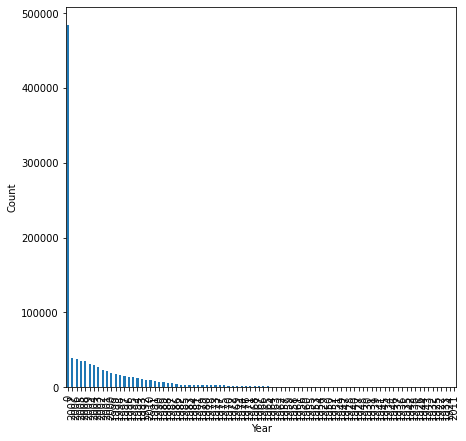

In [ ]:
# Plotting distributions of year for the songs

plt.figure(figsize=(7,7))

song_df['year'].value_counts().plot(kind='bar')

plt.xlabel('Year')

plt.ylabel('Count')
plt.show()

In [1]:
# Create the plot

# Set the figure size
#plt.figure(figsize = (30, 10))

#sns.barplot(x = song_df['year'].value_counts(),
#            y = 'title',
#            data = song_df['year'].value_counts(),
#            estimator = np.median)

# Set the y label of the plot
#plt.ylabel('number of titles played') 

# Show the plot
#plt.show()

### **Let us check the data types and and missing values of each column**

In [ ]:
# See the info of the count_df data
count_df.info()

count_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64

In [ ]:
# See the info of the song_df data
song_df.info()

song_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


song_id         0
title          15
release         5
artist_name     0
year            0
dtype: int64

#### **Observations and Insights:**
- Count_df doesn't have any missing data.
- Unnamed and play_count are numeric types (int64) and user_id and song_id are object.

- song_df has some missing values, 15 missing values for the column title and 5 missing values for column release.
- song_id, title, release and artist_name are all object data types.
- title, release and artisti_name can be saved as string datatypes.
- Only column year is numeric type (int64) in this data frame.

In [ ]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
df.drop(['Unnamed: 0'], axis =1, inplace = True)
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'user_id'.
df['user_id']= label_encoder.fit_transform(df['user_id'])

# Encode labels in column 'user_id'.
df['song_id']= label_encoder.fit_transform(df['song_id']) 

#df['user_id'].unique()
#df['song_id'].unique()

df.head()

# Many book_id contains combination of letters & digits. So we will convert the column to type 'string'
#df['book_id']= df['book_id'].astype(str)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [ ]:
# checking number of unique users and songs before the data merge and changing the id types and after

print(len(df['user_id'].unique()))
print(len(df['song_id'].unique()))

print(len(count_df['user_id'].unique()))
print(len(count_df['song_id'].unique()))
print(len(song_df['song_id'].unique()))

76353
10000
76353
10000
999056


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of songs
ratings_count = dict()

for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [ ]:
#MW: Looking at rating_count
# ratings_count


In [ ]:
#MW: Checking user_id counts in the original count_df dataframe
#count_df['user_id'].value_counts()

In [ ]:
#MW: Just checking if the sorted dictionary gives the same values as value counts in the original data frame
#dict(sorted(ratings_count.items(), key=lambda item: item[1],reverse=True))

In [ ]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_ratings in ratings_count.items():
    
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary from songs to their number of users
ratings_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [ ]:
#MW: Checking/looking at ratings_count
# ratings_count

In [ ]:
# MW: Checking song_id counts in the original count_df dataframe
#count_df['song_id'].value_counts()

In [ ]:
#MW: Just checking if the sorted dictionary gives the same values as value counts in the original data frame ()
#dict(sorted(ratings_count.items(), key=lambda item: item[1],reverse=True))

In [ ]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120

remove_songs = []

for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
#MW: Checkign the final dataframe
df_final.head()


,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [ ]:
#MW : checking variable year in the final dataset
df_final['year'].value_counts()

0       23876
2009    17960
2008    15245
2007    14646
2003     8530
2006     8178
2005     5719
2002     5714
2000     5117
2010     4482
2001     3231
2004     2496
1999     1924
1997     1656
1991     1479
1993     1436
1986     1291
1992      968
1974      689
1988      674
1990      621
1994      556
1976      535
1996      535
1987      367
1980      306
1979      299
1973      286
1995      277
1969      264
1975      224
1971      153
1981      150
1982      138
1970      130
1983      126
1978      120
Name: year, dtype: int64

In [ ]:
#MW: Checkign df_final dimentions
df_final.shape

(130398, 7)

In [ ]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final['play_count']<= 5]

In [ ]:
# Check the shape of the data
df_final.shape

(117876, 7)

## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

MW: Question: Total number of unique user id in the final or original data fame? I am assuming in the final dataframe.

Total number of unique user id

In [ ]:
# Display total number of unique user_id
len(df_final['user_id'].unique())

3155

Total number of unique song id

In [ ]:
# Display total number of unique song_id
len(df_final['song_id'].unique())

563

Total number of unique artists

In [ ]:
# Display total number of unique artists
len(df_final['artist_name'].unique())

232

In [ ]:
#MW: Cheking how many possibilities we have in our final dataframe
len(df_final['user_id'].unique()) * len(df_final['song_id'].unique())

1776265

In [ ]:
#MW: Checking how many interactions we already have
df_final.shape[0]

117876

In [ ]:
#MW: checking how many more possible interactions we have
len(df_final['user_id'].unique()) * len(df_final['song_id'].unique()) - df_final.shape[0]

1658389

#### **Observations and Insights:**

- Total number of unique user id: **3,155**
- Total number of unique song id: **563**
- Total number of unique artists: **232**

- We have 3,155 * 563 = **1,776,265** possible interactions between users and songs.
- We already have 117,876 interactions in our final data frame, so we have 1,776,265  -  117,876 = **1,658,389** possible interactions left.


### **Let's find out about the most interacted songs and interacted users**

MW: By most interacted I assume songs that has been played by most users and most iteracted users I understand users that has played most songs, not same song many times (considering user_id and song_id, not play_count).

Most interacted songs

In [ ]:
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

In [ ]:
# song_id for 5 most interacted songs
n=5
df_final['song_id'].value_counts()[:n].index.tolist()

[8582, 352, 2220, 1118, 4152]

In [ ]:
df_final[df_final['song_id']==8582]

,user_id,song_id,play_count,title,release,artist_name,year
1000,56576,8582,3,Use Somebody,Use Somebody,Kings Of Leon,2008
1305,49549,8582,4,Use Somebody,Use Somebody,Kings Of Leon,2008
4108,46525,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008
4518,7320,8582,1,Use Somebody,Use Somebody,Kings Of Leon,2008
7380,44449,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008
...,...,...,...,...,...,...,...
1992421,44328,8582,3,Use Somebody,Use Somebody,Kings Of Leon,2008
1992799,68669,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008
1993018,21762,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008
1994215,30647,8582,3,Use Somebody,Use Somebody,Kings Of Leon,2008


In [ ]:
# All the info for 5 most interacted songs
n = 5
df_final[df_final['song_id'] .isin(df_final['song_id'].value_counts()[:n].index.tolist())]

,user_id,song_id,play_count,title,release,artist_name,year
396,27018,1118,2,Clocks,A Rush Of Blood To The Head,Coldplay,2002
503,27018,4152,2,The Scientist,The Scientist,Coldplay,2002
907,56576,352,4,Dog Days Are Over (Radio Edit),Now That's What I Call Music! 75,Florence + The Machine,0
916,56576,1118,2,Clocks,A Rush Of Blood To The Head,Coldplay,2002
933,56576,2220,2,Sehr kosmisch,Musik von Harmonia,Harmonia,0
...,...,...,...,...,...,...,...
1995120,9570,2220,3,Sehr kosmisch,Musik von Harmonia,Harmonia,0
1995179,9570,4152,1,The Scientist,The Scientist,Coldplay,2002
1995374,9570,8582,2,Use Somebody,Use Somebody,Kings Of Leon,2008
1997916,12960,2220,2,Sehr kosmisch,Musik von Harmonia,Harmonia,0


In [ ]:
song_df['year'].value_counts()

0       484424
2007     39414
2006     37546
2005     34960
2008     34770
         ...  
1925         7
1922         6
1933         6
1924         5
2011         1
Name: year, Length: 90, dtype: int64

In [ ]:
# Titles for 5 most interactive songs
n=5
df_final.title[df_final['song_id'].isin(df_final['song_id'].value_counts()[:n].index.tolist())].unique()

array(['Clocks', 'The Scientist', 'Dog Days Are Over (Radio Edit)',
       'Sehr kosmisch', 'Use Somebody'], dtype=object)

Most interacted users

In [ ]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

In [ ]:
# user_id for 5 most interacted users
n=5
df_final['user_id'].value_counts()[:n].index.tolist()

[61472, 15733, 37049, 9570, 23337]

In [ ]:
df_final['song_id'].value_counts()

8582    751
352     748
2220    713
1118    662
4152    652
       ... 
9048    103
6450    102
990     101
4831     97
8324     96
Name: song_id, Length: 563, dtype: int64

In [ ]:
df_final[df_final['song_id']==4152]

,user_id,song_id,play_count,title,release,artist_name,year
503,27018,4152,2,The Scientist,The Scientist,Coldplay,2002
952,56576,4152,2,The Scientist,The Scientist,Coldplay,2002
13627,22749,4152,1,The Scientist,The Scientist,Coldplay,2002
16179,37938,4152,1,The Scientist,The Scientist,Coldplay,2002
19380,34445,4152,1,The Scientist,The Scientist,Coldplay,2002
...,...,...,...,...,...,...,...
1992064,14416,4152,2,The Scientist,The Scientist,Coldplay,2002
1992385,44328,4152,3,The Scientist,The Scientist,Coldplay,2002
1992750,68669,4152,1,The Scientist,The Scientist,Coldplay,2002
1994169,30647,4152,3,The Scientist,The Scientist,Coldplay,2002


#### **Observations and Insights:**

- As mentioned before, I assume that most interacted songs and users means song that has been listen to the most users and users that listen to many songs (not same song listen many times per user).

- The most interacted songs are:

  *    'Use Somebody' by Kings Of Leon - 751 users
  *    'Dog Days Are Over (Radio Edit)' by Florence + The Machine - 748 users
  *   'Sehr kosmisch' by Harmonia  - 713 users 
  *   'Clocks' by Coldplay -  662 users
  *   'The Scientist' by Coldplay - 652 users


- The most interacted unsers are:
*    61472 - 243 songs
*    15733 - 227 songs
*    37049 - 202 songs
*    9570 - 184 songs
*    23337 - 177 songs

- Unfortunately, we only have user_id and can't tell much about users just from their ids (only what songs they listen to and how many times).



Songs played in a year

In [ ]:
count_songs = df_final.groupby('year').count()['title']

count = pd.DataFrame(count_songs)

count.drop(count.index[0], inplace = True)

count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


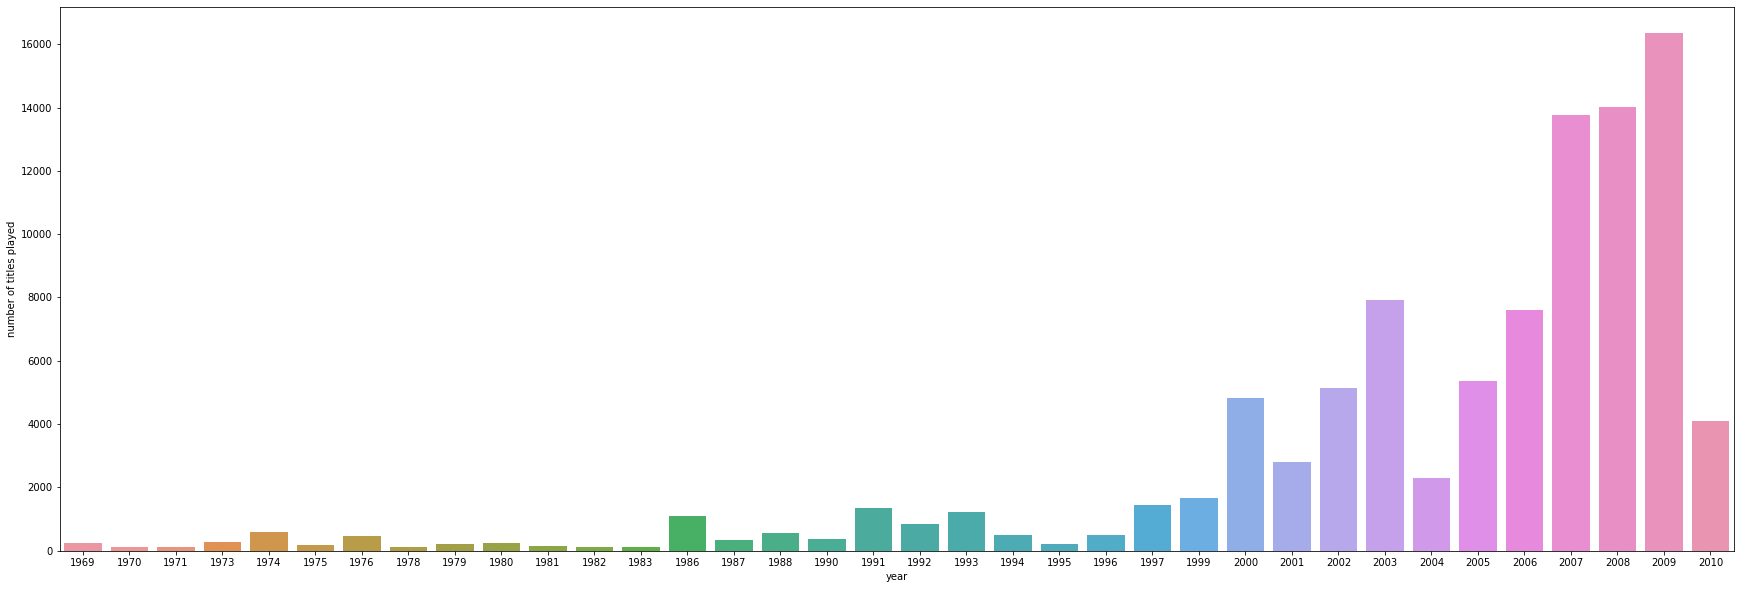

In [ ]:
# Create the plot

# Set the figure size
plt.figure(figsize = (30, 10))

sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)

# Set the y label of the plot
plt.ylabel('number of titles played') 

# Show the plot
plt.show()

#### **Observations and Insights:** # 

- Looks like the most songs played are from 2009, also 2008 and then 2007
- Number os songs played in 2006 is almost half of those from 2009
- "Youngest" songs played are from 2010, and their number is only 1/4th of all songs payed in 2008, which makes sense. The data set is from 2012, the younger songs didn't have enough time to get really popular.
- There's also greater amount of songs played in 2003 and 200.
- In general, younger songs were more popular (209,2008,2007, then 2003, 2005, 2010 and 2002 and 2000).


**Think About It:** What other insights can be drawn using exploratory data analysis?

- We can fingure out which were the most popular songs to play and also most favorite ones - which songs were played more than ones by a user.


## **Proposed approach**
**Potential techniques:** What different techniques should be explored?<br>

-	Knowledge/Rank Based recommendation system
-	Similarity-Based Collaborative filtering (user-user, item-item models)
-	Matrix Factorization Based Collaborative Filtering

**Overall solution design:** What is the potential solution design?<br>

-	Loading data and Exploratory Data Analysis
  1.	Checking for missing values.
  2.	Summary statistics.
  3.	Checking the number of unique users and songs.
  4.	Data preparation.
-	Create final data frame: merge two data frames and also chose only users who listened to at least 90 songs and songs which have been listened to by at least 120 users also dropping records with play_count greater than 5.
-	Create models
  -	Model 1: Rank Based Recommendation System
    - Create function top_10_songswhich will recommend top 10 songs for a user based on the likelihood of listening to those songs.
  -	Model 2: Collaborative Filtering Recommendation System
User-user and item -item
    -	Building a baseline user-user and item-item similarity-based recommendation systems.
    -	Initialize the KNNBasic model using sim_options provided, Verbose=False, and setting random_state=1.
    -	Fit the model on the training data. 
    - Use the precision_recall_at_k function to calculate the metrics on the test data.
    -	Improving similarity-based recommendation system by tuning its hyperparameters.
    -	Create function top_10_songswhich will recommend top 10 songs for a user based on the likelihood of listening to those songs.

  -	Model 3: Matrix factorization
    - Singular Value Decomposition (SVD).
    -	Fit the SVD model using the hyperparameters from GridSearchCV.
    -	Get recommendations.

**Measures of success:** What are the key measures of success to compare different potential technqiues?<br>
-	For performance evaluation of above-mentioned models precision@k and recall@k will be used.
-	Using these two metrics, the F_1 score  
-	will be calculated for each working model.
-	RMSE (Root Mean Square Error) will also be used to evaluate best solution.
-	Best model will have greatest F-1 (and ideally Precision and Recall) and minimum RMSE.
